# NetworkX

[NetworkX](https://networkx.org/) is a Python package for dealing with complex networks (graphs).  It provides Graph classes, graph algorithms, and visualization tools.

You may need to
```bash
(pycourse) conda install networkx
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
nx.__version__

'2.5'

We'll cover some basics in NetworkX.  You can find additional information in the [NetworkX documentation](https://networkx.github.io/documentation/stable/), which includes [a tutorial](https://networkx.github.io/documentation/stable/tutorial.html).

First, let's create a simple graph:

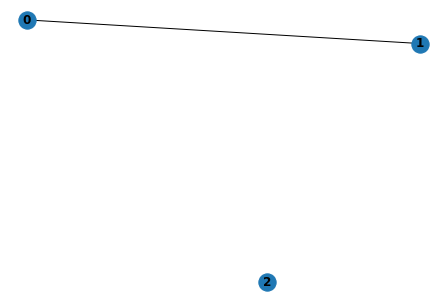

In [5]:
G = nx.Graph()

# add nodes
G.add_node(0, name="dog")
G.add_node(1)
G.add_nodes_from(range(3)) # adds nodes 0, 1

# add edge from node 0 to node 1
G.add_edge(0,1)

# draws the graph to pyplot axes
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

Graph nodes can be any hashable object, which covers many things you might use

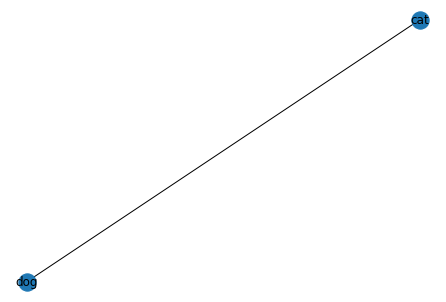

In [6]:
G = nx.Graph()

# add nodes
G.add_node("dog")
G.add_node("cat")

# add edge
G.add_edge("cat","dog")

# draws the graph to pyplot axes
nx.draw(G, with_labels=True)
plt.show()

You can also associate arbitrary data with each node and edge by passing in keyword arguments

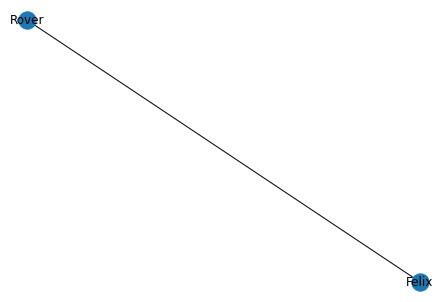

In [13]:
G = nx.Graph()

# add nodes
G.add_node("dog", name="Rover", weight=10.0)
G.add_node("cat", name="Felix", height=5)

# add edge
G.add_edge("cat","dog", time=2.0)

# draws the graph to pyplot axes
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, "name"))
plt.show()

In [5]:
G.get_edge_data("cat", "dog")

{'time': 2.0}

In [6]:
nx.get_edge_attributes(G, "time")

{('dog', 'cat'): 2.0}

In [7]:
names = nx.get_node_attributes(G, "name")
names

{'dog': 'Rover', 'cat': 'Felix'}

In [14]:
weights = nx.get_node_attributes(G, "weight")
weights

{'dog': 10.0}

## Generating Graphs
NetworkX provides [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html) to generate a variety of random graphs. 

### Random Graphs

#### Erdos-Renyi Graphs

An Erdos-Renyi random graph $G_{n,p}$ is a graph on $n$ nodes, where the probability of an edge $(i,j)$ existing is $p$.  In NetworkX, this is called a `gnp` graph.

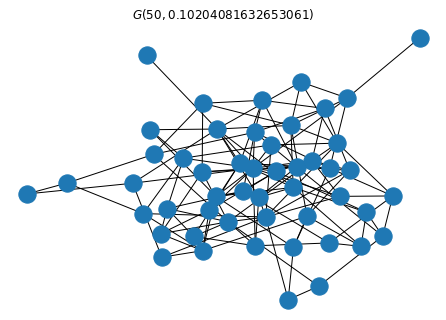

In [21]:
n = 50
p = 5 / (n-1) # 5 is expected number of neighbors of a single vertex
G = nx.gnp_random_graph(n, p)
nx.draw(G, with_labels=False)
plt.title(r'$G({},{})$'.format(n,p))
plt.show()

#### Stochastic Block Models

A Graph generated from a stochastic block model (SBM) has $k$ clusters, and a $k\times k$ (symmetric) matrix $P$ of probabilities, where $P_{i,j}$ is the probability that a pair of nodes $(a,b)$ will be joined by an edge if $a$ is in cluster $i$ and $b$ is in cluster $j$.

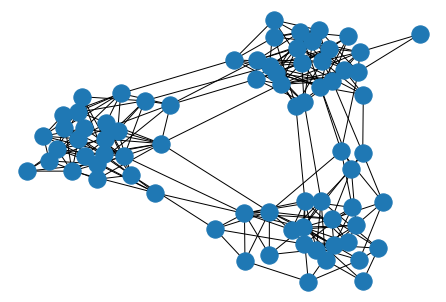

In [33]:
ns = [25, 25, 25] # size of clusters
ps = [[0.3, 0.01, 0.01], [0.01, 0.3, 0.01], [0.01, 0.01, 0.3]] # probability of edge
G = nx.stochastic_block_model(ns, ps)
nx.draw(G, with_labels=False)
plt.show()

## Visualization

Visualizing graphs is often a great way to see and understand information.

Unless there is some "ground truth" way to lay out nodes (meaning each node has an associated coordinate), we must choose some way to place nodes in our visualization.  There are a variety of methods for this.


### Layouts

There are several layout methods you might use, which are good for certain applications.

**Spectral Embeddings** are good for partitioning the graph into clusters.

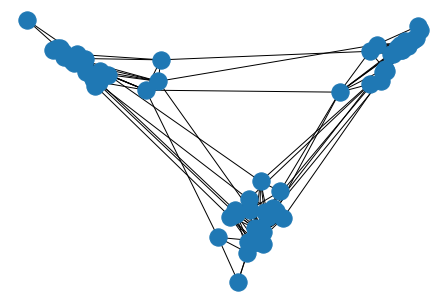

In [27]:
nx.draw_spectral(G)
plt.show()

**Spring layouts** tend to do a good job of separating nodes, which can be nice for visualization

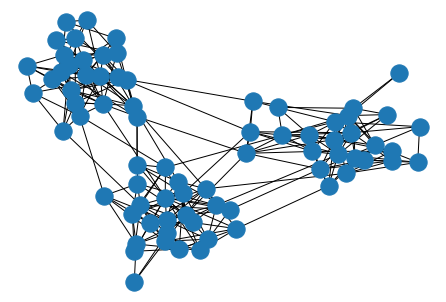

In [28]:
nx.draw_spring(G)
plt.show()

the [Kamada-Kawai algorithm](https://www-sciencedirect-com.proxy.uchicago.edu/science/article/pii/0020019089901026?via%3Dihub) also gives visually pleasing results.

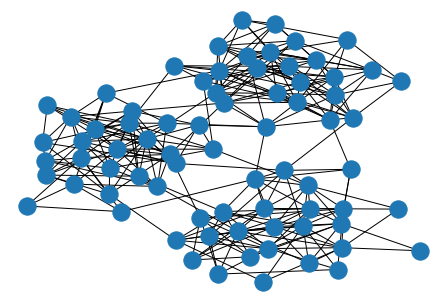

In [29]:
nx.draw_kamada_kawai(G)
plt.show()

In [35]:
pos = nx.kamada_kawai_layout(G)
pos

{0: array([0.17110579, 0.96050409]),
 1: array([-0.07340844,  0.39883311]),
 2: array([-0.1636278 ,  0.80843733]),
 3: array([0.6557681 , 0.34205121]),
 4: array([0.24983722, 0.66262339]),
 5: array([0.66428275, 0.46626272]),
 6: array([0.18279235, 0.50528361]),
 7: array([-0.00311155,  0.72496871]),
 8: array([0.45659536, 0.03043568]),
 9: array([0.37525956, 0.70189348]),
 10: array([-0.21879532,  0.62791278]),
 11: array([0.37069697, 0.98009284]),
 12: array([0.25848514, 0.27074475]),
 13: array([0.50460278, 0.66928933]),
 14: array([0.71199042, 0.66230768]),
 15: array([0.58155124, 0.10662501]),
 16: array([0.27799907, 0.49193621]),
 17: array([0.32311994, 0.2392366 ]),
 18: array([0.04597729, 0.34867528]),
 19: array([0.40591381, 0.39122102]),
 20: array([0.1402521 , 0.72953965]),
 21: array([0.70020601, 0.03658417]),
 22: array([0.52709292, 0.5576614 ]),
 23: array([0.52252782, 0.82177566]),
 24: array([0.82134001, 0.30528987]),
 25: array([-0.53368525, -0.0098704 ]),
 26: array([

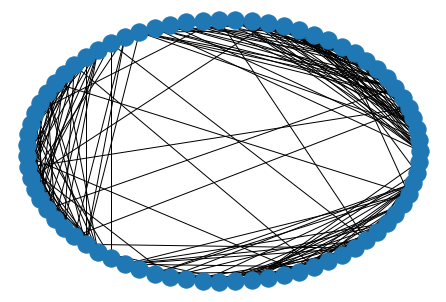

In [30]:
nx.draw_circular(G)

## Algorithms

NetworkX implements a variety of graph algorithms.

### Shortest Paths

A path between nodes $x$ and $y$ is a sequence of edges where the target of an edge is the source of the next edge.
\begin{equation}
(x, v_0), (v_0, v_1), \dots, (v_k, y)
\end{equation}
The length of the path is the number of edges in the sequence.  A shortest path is a path with the shortest length over all possible paths.

We'll illustrate on a 2D grid:

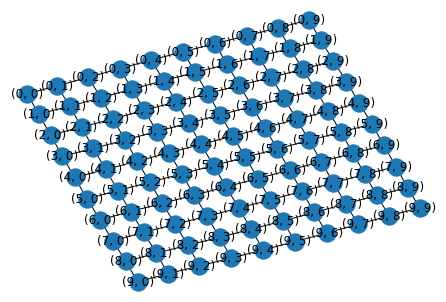

In [38]:
G = nx.grid_2d_graph(10,10)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)

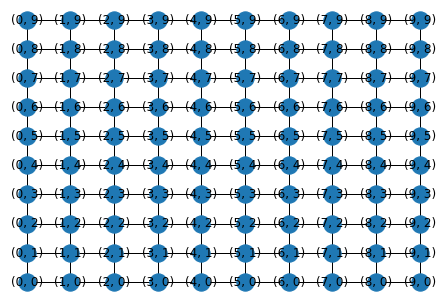

In [41]:
pos = {(i,j): np.array([i,j]) for i in range(10) for j in range(10)}
nx.draw(G, pos, with_labels=True)

The nodes of this 2D grid are indexed by coordinates $(i,j)$.

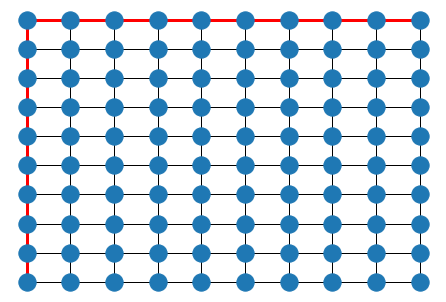

In [42]:
p = nx.shortest_path(G, (0,0), (9,9))
elist = [[p[i], p[i+1]] for i in range(len(p)-1)]
nx.draw(G, pos)
nx.draw_networkx_edges(G, pos, elist, edge_color='r', width=3.0)
plt.show()

The length of the shortest path between any two nodes in a graph $G$ defines a metric on the vertex set (this is analagous to the geodesic metric on a manifold).

In [43]:
dists = nx.shortest_path_length(G)

This creates an iterator over shortest path lengths for each node

### Exercise

Write a function which returns a distance matrix for the shortest path length.

In [ ]:
## Your code here


### Spanning Trees

A tree is a connected graph with no cycles.  If the graph has $n$ nodes, it must have $m = n-1$ edges to be a tree.

A spanning tree of a graph $G$ is a sub-graph with the same set of nodes, and a subset of edges that forms a tree.  A minimum spanning tree (MST) is a spanning tree with minimum weight (you can weight edges using a `'weight'` attribute).

You can compute a spanning tree of a graph using `nx.tree.minimum_spanning_tree`, or `nx.tree.minimum_spanning_edges`.  Other tree algorithms are provided [as well](https://networkx.org/documentation/stable/reference/algorithms/tree.html).



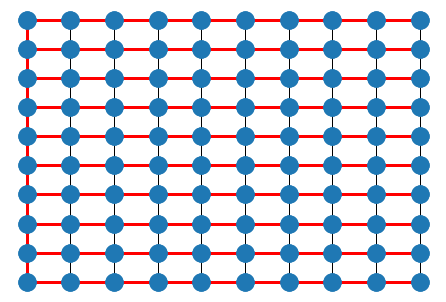

In [45]:
T = nx.tree.minimum_spanning_tree(G)

nx.draw(G, pos)
nx.draw(T, pos, edge_color='r', width=3.0)
plt.show()

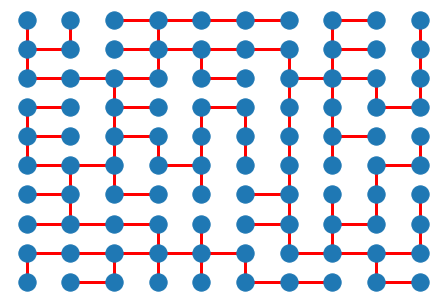

In [46]:
# set random weights
for i,j in G.edges():
    G[i][j]['weight'] = np.random.rand()
    
    
T = nx.tree.minimum_spanning_tree(G)

# nx.draw(G, pos, )
nx.draw(T, pos, edge_color='r', width=3.0)
plt.show()

### Exercise

Create a function that generates a maze on a 2-dimensional $m \times n$ grid using `nx.grid_2d_graph` and a randomly weighted MST.  Place the start and end points at $(0,0)$ and $(m-1, n-1)$ respectively.

Create a function that solves a maze by computing the shortest path between the start and end points.

In [ ]:
## Your code here


### Bipartite Graphs

A [bipartite graph](https://en.wikipedia.org/wiki/Bipartite_graph) is a graph where nodes are separated into two sets $U, V$, and where edges are of the form $(u,v)$ with $u\in U$, and $v\in V$ (there are no edges between two points in $U$ or two points in $V$).

Bipartite graphs are often used to encode matching problems.  For example, dating websites might match romantic partners, and ride apps such as Uber and Lyft might match riders with drivers.

NetworkX functionality for biparite graphs is in [`nx.algorithms.bipartite`](https://networkx.org/documentation/stable/reference/algorithms/bipartite.html)

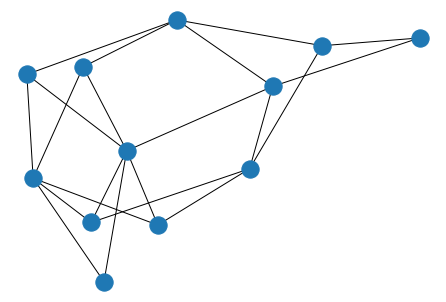

In [47]:
from networkx.algorithms import bipartite

B = bipartite.random_graph(5, 7, 0.5)

nx.draw(B)

In [48]:
B.nodes(data=True)

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 1}, 6: {'bipartite': 1}, 7: {'bipartite': 1}, 8: {'bipartite': 1}, 9: {'bipartite': 1}, 10: {'bipartite': 1}, 11: {'bipartite': 1}})

Let's explicitly define positions to visualize the bipartite graph

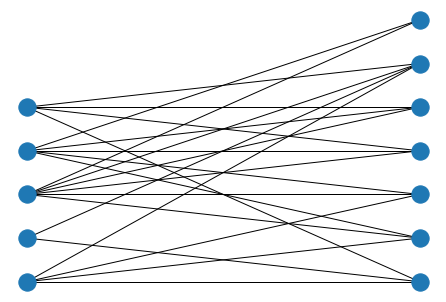

In [49]:
pos = {}
cts = [0, 0]

for i, data in B.nodes(data=True):
    group = data['bipartite']
    pos[i] = np.array([group, cts[group]])
    cts[group] = cts[group] + 1
    
nx.draw(B, pos)

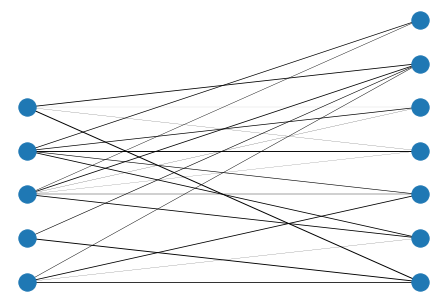

In [50]:
# set random weights
for i,j in B.edges():
    B[i][j]['weight'] = np.random.rand()
    
weights = [B[u][v]['weight'] for u,v in B.edges()]
    
nx.draw(B, pos, width=weights)

In [51]:
# compute maximum matching
match = bipartite.maximum_matching(B)
match

{0: 5, 1: 10, 2: 6, 3: 7, 4: 8, 5: 0, 6: 2, 7: 3, 8: 4, 10: 1}

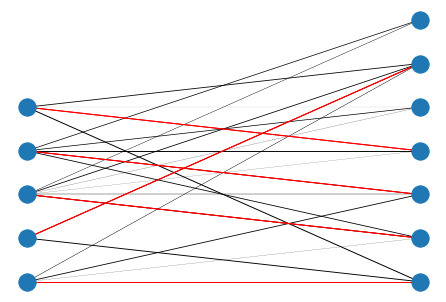

In [52]:
elist = [[k, v] for k, v in match.items()]

nx.draw(B, pos, width=weights)
nx.draw_networkx_edges(B, pos, elist, edge_color='r', width=1.0)
plt.show()

### Other Graph Algorithms

There are many interesting applications of graphs and many graph algorithms that you might consider using.  See the [NetworkX algorithms documentation](https://networkx.org/documentation/stable/reference/algorithms/index.html) to see what some of the possibilities are.

## Reading Graphs

In scientific computing, you'll typically get a graph from some sort of data.  Often these graphs are referred to as "complex networks".  One good source of data is the [Stanford Large Network Dataset Collection](http://snap.stanford.edu/data/index.html)

Graphs can be stored in a variety of formats.  You can find documentation for NetworkX's read/write capabilities [here](https://networkx.org/documentation/stable/reference/readwrite/index.html).

There are also some built-in example graphs in NetworkX. One example graph is the [Zachary Karate Club Graph](https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html), which encodes friendships between individuals in a Karate club.  There are some other example [social network graphs](https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.social)

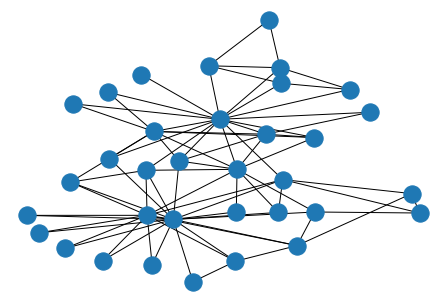

In [28]:
G = nx.karate_club_graph()
nx.draw_kamada_kawai(G)

Here's an example of reading and writing a graph as an edgelist:

In [29]:
B = bipartite.random_graph(5, 7, 0.5)
nx.write_edgelist(B, "bipartite.graph")

In [30]:
B2 = nx.read_edgelist("bipartite.graph")